<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Major_Project_1_arthritis_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import sys
assert sys.version_info>=(3,5)
import sklearn
assert sklearn.__version__>="0.20"
import numpy as np
import pandas as pd
import random
np.random.seed(42)
import os
import io
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)


In [38]:
PROJECT_ROOT_DIR=" "
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR,"images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_first(fig_id,tight_layout=True,fig_extension="png",resolution=300):
  path=os.path.join(IMAGES_PATH,fig_id + "," + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [39]:
uploaded = files.upload()

In [40]:
df = pd.read_csv("Arthritis_Dataset.csv")
df.head(10)

,ID,SJC,RF,Anti - CCP,ESR,Age,CRP,RA(1 or 0)
0,KB-R-11-0,2,6.2,31.2,52,52,4.55,0
1,KB-R-11-1,2,159.7,-1.0,65,64,0.46,0
2,KB-R-11-2,7,129.7,29.7,26,75,1.34,1
3,KB-R-11-3,3,88.6,150.9,40,52,0.18,0
4,KB-R-11-4,0,8.0,225.7,16,57,0.03,0
5,KB-R-11-5,0,72.7,50.9,13,62,0.06,0
6,KB-R-11-6,12,3.0,17.9,26,51,0.46,0
7,KB-R-11-7,0,70.6,6.5,64,57,0.37,0
8,KB-R-11-8,0,8.4,100.0,29,73,0.05,0
9,KB-R-11-9,5,48.3,135.4,81,67,7.20,1


In [41]:
print(df.dtypes)
print(df.isnull().sum())
df.describe()

ID             object
SJC             int64
RF            float64
Anti - CCP    float64
ESR             int64
Age             int64
CRP           float64
RA(1 or 0)      int64
dtype: object
ID            0
SJC           0
RF            0
Anti - CCP    0
ESR           0
Age           0
CRP           0
RA(1 or 0)    0
dtype: int64


,SJC,RF,Anti - CCP,ESR,Age,CRP,RA(1 or 0)
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,5.322581,70.035484,86.580645,46.870968,65.387097,2.586452,0.322581
std,4.214159,90.527512,83.714485,30.520749,11.134563,3.113174,0.475191
min,0.000000,3.000000,-1.000000,5.000000,50.000000,0.030000,0.000000
25%,2.000000,10.800000,10.800000,26.500000,55.500000,0.335000,0.000000
50%,5.000000,45.700000,81.900000,40.000000,65.000000,1.340000,0.000000
75%,7.000000,80.650000,125.650000,59.000000,73.000000,2.995000,1.000000
max,14.000000,448.800000,300.000000,120.000000,88.000000,11.750000,1.000000


In [42]:
df = df.drop(columns = "ID", axis = 1)
df.head()

,SJC,RF,Anti - CCP,ESR,Age,CRP,RA(1 or 0)
0,2,6.2,31.2,52,52,4.55,0
1,2,159.7,-1.0,65,64,0.46,0
2,7,129.7,29.7,26,75,1.34,1
3,3,88.6,150.9,40,52,0.18,0
4,0,8.0,225.7,16,57,0.03,0


In [43]:
X = df.drop(columns = "RA(1 or 0)", axis = 1).values
y = df["RA(1 or 0)"].values


<Figure size 1600x1000 with 0 Axes>

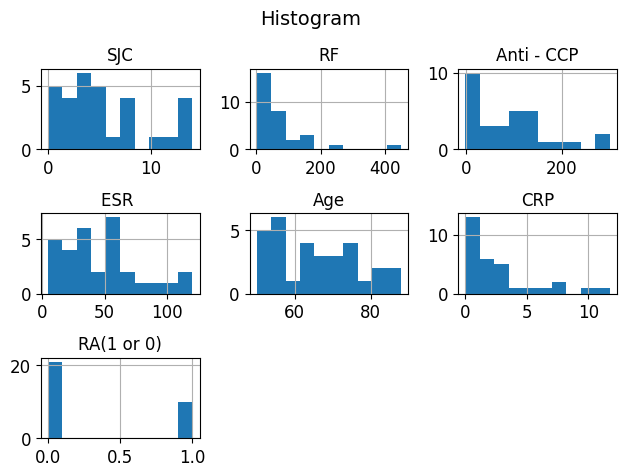

In [44]:
plt.figure(figsize=(16,10))
df.hist()
plt.suptitle("Histogram", fontsize=14)
plt.tight_layout(pad=1)
plt.show()

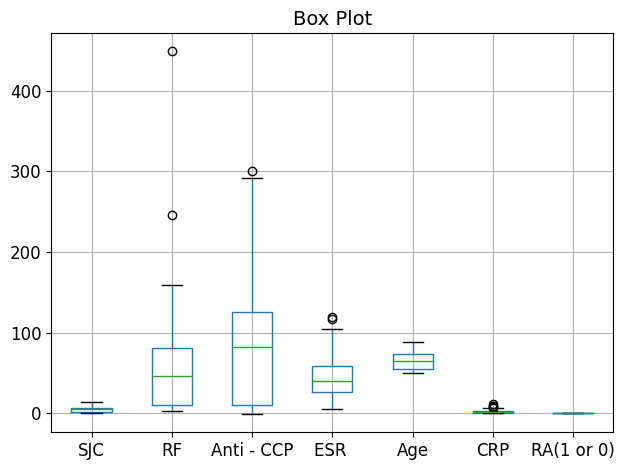

In [45]:
df.boxplot()
plt.title("Box Plot", fontsize = 14)
plt.tight_layout()
plt.show()

                 SJC        RF  Anti - CCP      ESR        Age       CRP  \
SJC         1.000000  0.111748   -0.064818  0.172937  0.172005  0.335827   
RF          0.111748  1.000000    0.185179 -0.062887  0.129234 -0.209424   
Anti - CCP -0.064818  0.185179    1.000000  0.048349  0.215427  0.005327   
ESR         0.172937 -0.062887    0.048349  1.000000  0.350910  0.597692   
Age         0.172005  0.129234    0.215427  0.350910  1.000000  0.416690   
CRP         0.335827 -0.209424    0.005327  0.597692  0.416690  1.000000   
RA(1 or 0)  0.362445  0.286040    0.285982  0.478723  0.372510  0.396694   

            RA(1 or 0)  
SJC           0.362445  
RF            0.286040  
Anti - CCP    0.285982  
ESR           0.478723  
Age           0.372510  
CRP           0.396694  
RA(1 or 0)    1.000000  


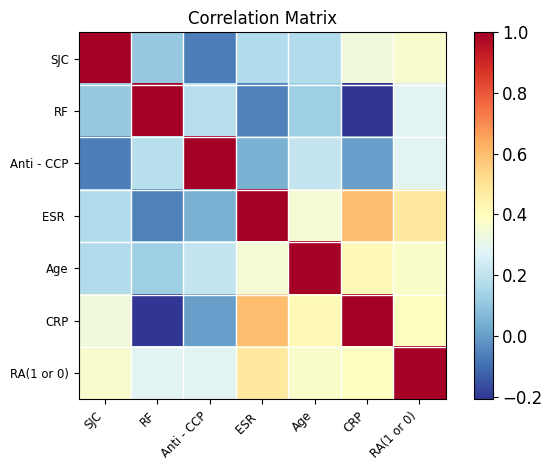

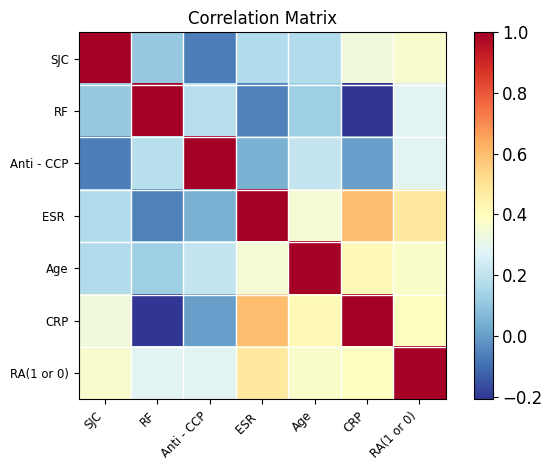

In [46]:
corr=df.corr()
print(corr)
sm.graphics.plot_corr(corr,xnames=list(corr.columns))

Text(0.5, 0.98, 'Pair Plot')

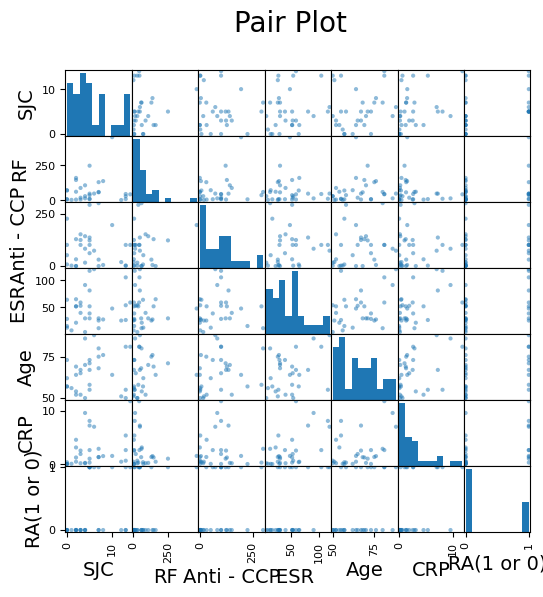

In [47]:
scatter_matrix(df,figsize=(6,6))
plt.suptitle("Pair Plot", fontsize=20)

In [48]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

In [49]:
model=LogisticRegression()
model=model.fit(X,y)
model.score(X,y)

0.9032258064516129

In [50]:
for i in range(-4,5):
  val=10**i
  svm_clf = SVC(kernel='linear',C=val)
  svm_clf.fit(X_scaled,y)
  y_pred=svm_clf.predict(X_scaled)
  print(f"Accuracy({val}): ", accuracy_score(y,y_pred))

Accuracy(0.0001):  0.6774193548387096
Accuracy(0.001):  0.6774193548387096
Accuracy(0.01):  0.6774193548387096
Accuracy(0.1):  0.8387096774193549
Accuracy(1):  0.8709677419354839
Accuracy(10):  0.8709677419354839
Accuracy(100):  0.9354838709677419
Accuracy(1000):  0.9354838709677419
Accuracy(10000):  0.9354838709677419


In [51]:
for i in range(-4,5):
  val=10**i
  svm_clf = SVC(kernel='rbf',C=val,gamma=val)
  svm_clf.fit(X_scaled,y)
  y_pred=svm_clf.predict(X_scaled)
  print(f"Accuracy({val}): ", accuracy_score(y,y_pred))

Accuracy(0.0001):  0.6774193548387096
Accuracy(0.001):  0.6774193548387096
Accuracy(0.01):  0.6774193548387096
Accuracy(0.1):  0.6774193548387096
Accuracy(1):  0.967741935483871
Accuracy(10):  1.0
Accuracy(100):  1.0
Accuracy(1000):  1.0
Accuracy(10000):  1.0


In [52]:
svm_clf=SVC(kernel='rbf',C=100,gamma=0.1)
svm_clf.fit(X_scaled,y)
y_pred=svm_clf.predict(X_scaled)
print(accuracy_score(y,y_pred))

0.967741935483871


In [53]:
age_bins = [50, 60, 70, 80, 90, 100]
age_labels = ['50s', '60s', '70s', '80s', '90s']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['AgeGroup'].value_counts().sort_index()
RA_data = df[df['RA(1 or 0)']==1]
non_RA_data = df[df['RA(1 or 0)']==0]

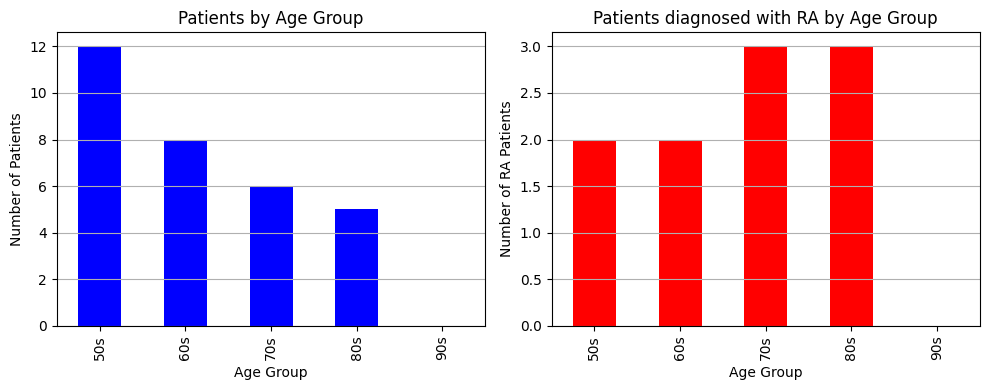

In [54]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
age_group_counts.plot(kind='bar', color='blue', fontsize=10)
plt.title('Patients by Age Group')
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of Patients', fontsize=10)
plt.grid(axis='y')

plt.subplot(122)
RA_data['AgeGroup'].value_counts().sort_index().plot(kind='bar', color='red', fontsize=10)
plt.title('Patients diagnosed with RA by Age Group')
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Number of RA Patients', fontsize=10)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<ipython-input-55-d3b0fa7016f0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='RA(1 or 0)').mean()
<ipython-input-55-d3b0fa7016f0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='RA(1 or 0)').mean().plot(kind='bar', fontsize=8)


<Figure size 1200x400 with 0 Axes>

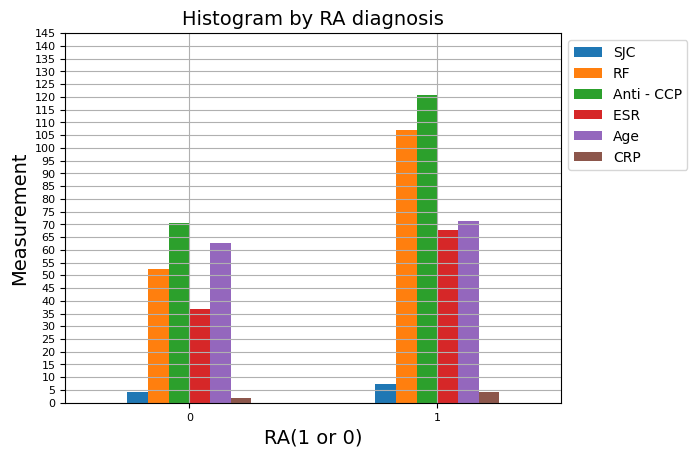

<Figure size 2000x1000 with 0 Axes>

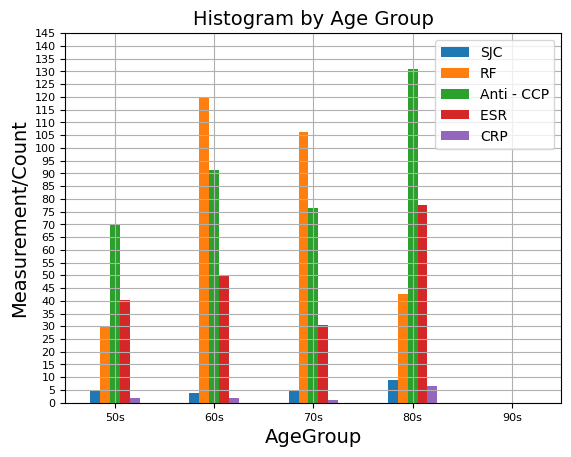

In [55]:
plt.figure(figsize=(12,4))
df.groupby(by='RA(1 or 0)').mean()
df.groupby(by='RA(1 or 0)').mean().plot(kind='bar', fontsize=8)
plt.title('Histogram by RA diagnosis', fontsize=14)
plt.ylabel('Measurement')
plt.yticks(range(0,150,5))
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

cols = ['Age','RA(1 or 0)']
df2=df.drop(columns = cols)
plt.figure(figsize=(20,10))
df2.groupby(by='AgeGroup').mean()
df2.groupby(by='AgeGroup').mean().plot(kind='bar', fontsize=8)
plt.title("Histogram by Age Group", fontsize=14)
plt.ylabel('Measurement/Count')
plt.yticks(range(0,150,5))
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1,1))


In [56]:
age_group_percentage = (df['AgeGroup'].value_counts(normalize=True) * 100).reset_index()
age_group_percentage.columns = ['AgeGroup', 'Percentage']
print(age_group_percentage)

  AgeGroup  Percentage
0      50s   38.709677
1      60s   25.806452
2      70s   19.354839
3      80s   16.129032
4      90s    0.000000


In [57]:
df1=df
#percentage of each age group in the given data sample as a dictionary
df1['AgeGroupPercentage'] = ((df1.groupby('AgeGroup')['RA(1 or 0)'].transform('count') / df1.shape[0]))*100
age_group_percentage_dict = df1.set_index('AgeGroup')['AgeGroupPercentage'].to_dict()
age_group_percentage_dict

{'50s': 38.70967741935484,
 '60s': 25.806451612903224,
 '70s': 19.35483870967742,
 '80s': 16.129032258064516}

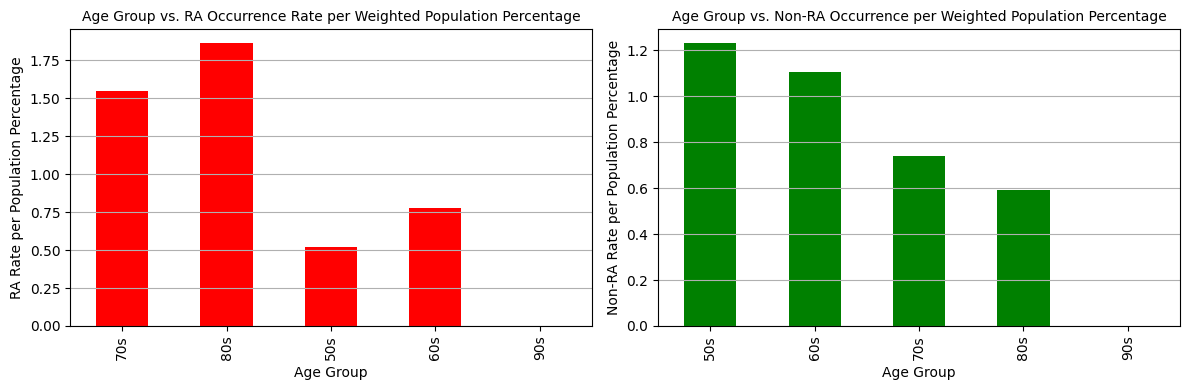

In [58]:
RA_df = df1[df1['RA(1 or 0)']==1]
age_RA_rate = RA_df['AgeGroup'].value_counts(normalize=True)*100
RA_rate_per_population = age_RA_rate / age_RA_rate.index.map(age_group_percentage_dict)

non_RA_df = df1[df1['RA(1 or 0)']==0]
age_non_RA_rate = non_RA_df['AgeGroup'].value_counts(normalize=True)*100
non_RA_rate_per_population = age_non_RA_rate / age_non_RA_rate.index.map(age_group_percentage_dict)

plt.figure(figsize=(12, 4))

plt.subplot(121)
RA_rate_per_population.plot(kind='bar', color='red', fontsize=10)
plt.title('Age Group vs. RA Occurrence Rate per Weighted Population Percentage', fontsize=10)
plt.xlabel('Age Group',fontsize=10)
plt.ylabel('RA Rate per Population Percentage',fontsize=10)
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.subplot(122)
non_RA_rate_per_population.plot(kind='bar', color = 'green', fontsize=10)
plt.title('Age Group vs. Non-RA Occurrence per Weighted Population Percentage', fontsize=10)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Non-RA Rate per Population Percentage', fontsize=10)
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [59]:
df.head(2)

,SJC,RF,Anti - CCP,ESR,Age,CRP,RA(1 or 0),AgeGroup,AgeGroupPercentage
0,2,6.2,31.2,52,52,4.55,0,50s,38.709677
1,2,159.7,-1.0,65,64,0.46,0,60s,25.806452


1.0
0.967741935483871
1.0
1.0
1.0


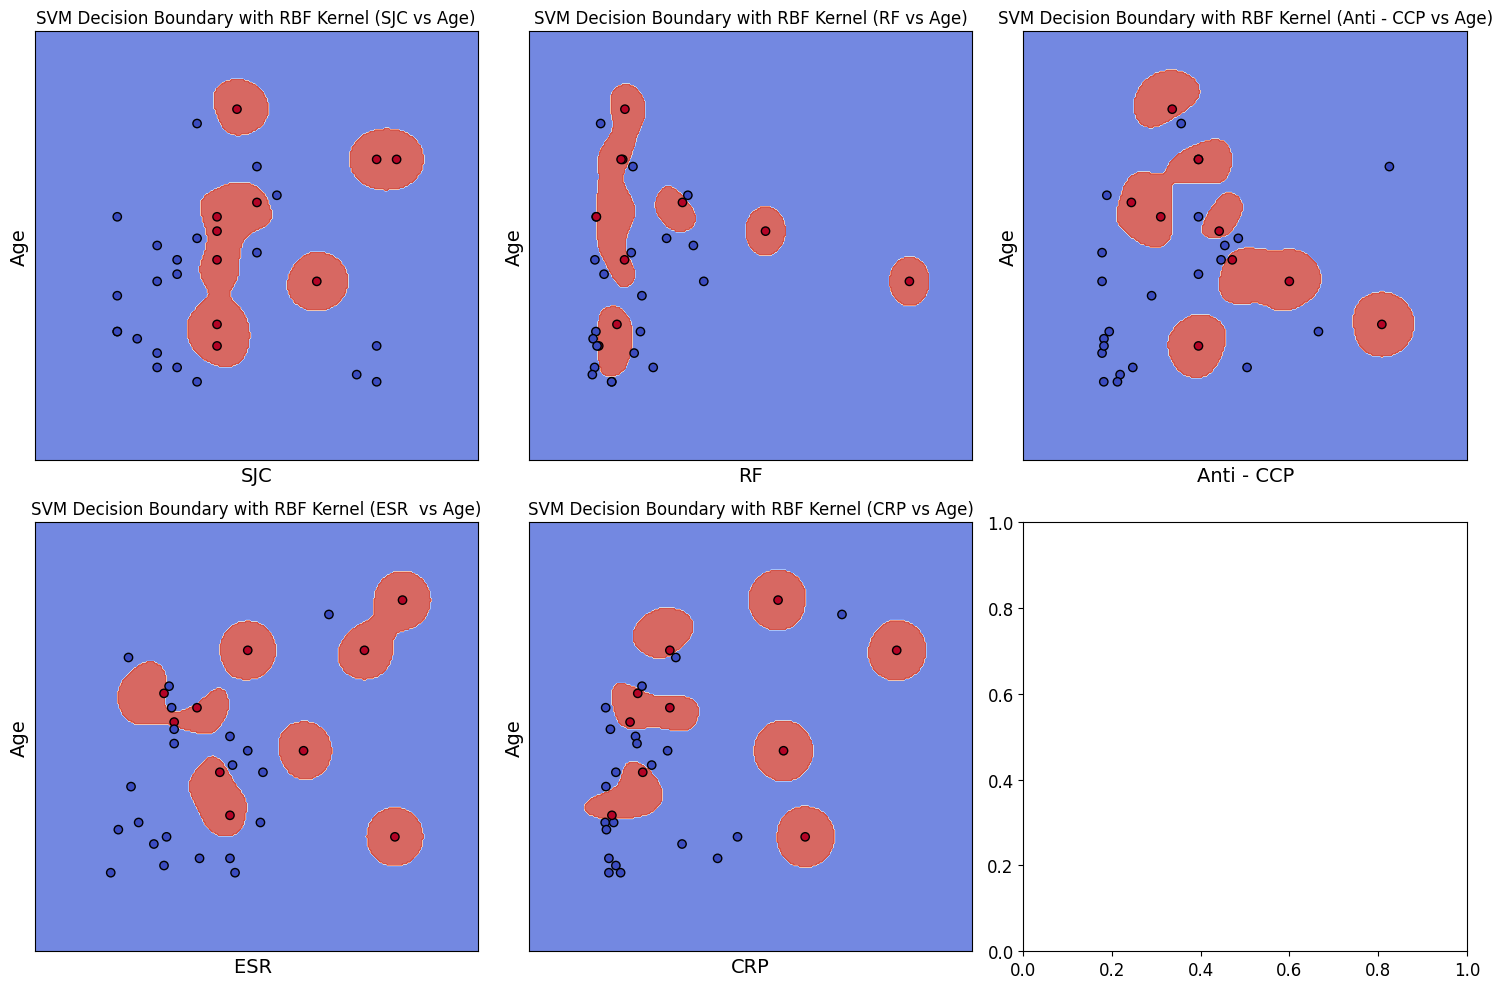

In [93]:
y_=df['RA(1 or 0)'].values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
plot_index = 0

for i in range(0,6):
  if i != 4:
    X1=df.drop('RA(1 or 0)',axis=1).iloc[:,[i,4]].values
    X1_scaled=scaler.fit_transform(X1)

    svm_clf1 = SVC(kernel='rbf', C=1000, gamma=10)
    svm_clf1.fit(X1_scaled,y_)
    y_pred=svm_clf1.predict(X1_scaled)
    print(accuracy_score(y_,y_pred))
    column_name = df.columns[i]
    ax = axes[plot_index]

    h = 0.02
    x_min, x_max = X1_scaled[:, 0].min() - 1, X1_scaled[:, 0].max() + 1
    y_min, y_max = X1_scaled[:, 1].min() - 1, X1_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svm_clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_xlabel(column_name)
    ax.set_ylabel("Age")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(f"SVM Decision Boundary with RBF Kernel ({column_name} vs Age)")
    plot_index += 1

plt.tight_layout()
plt.show()
